# Visual Testing of image transforms
This notebook allows you to test how much image transforms affect approximate search. Key capabilities:
- define data source: any database linked to an S3 bucket
    - TODO: api database hooked to crowdsourced data
    - scraping database
    - list of urls
- define threshold of ImageSearch module
- assert the transformed image is the same
- view top n similar images in the database

#### ref for widgets: https://github.com/WillKoehrsen/Data-Analysis/blob/master/widgets/Widgets-Overview.ipynb

#### all imports

In [1]:
%matplotlib inline
from transforms import imageTransforms
from ipywidgets import interact
from pprint import pprint
from viz_helpers import get_db, load_images_tuple, build_search, get_random_image, get_default_transforms, get_transform, plot_transforms, interact_setup, get_similar, plot_similar

### specifying the data source and threshold
#### HERE: EDIT THIS: define parameters here

In [2]:
# DATA_SOURCE = 'list_files' lets you run on a list of files
# edit 'FILE_URL' to add the list of files

# DATA_SOURCE = 'scraping_database' runs on scraped data
# DATA_SOURCE = 'api_database' not set up yet

DATA_SOURCE = 'scraping_database' # 'list_files' | 'api_database' | 'scraping_database'
FILE_URL = ['https://picsum.photos/id/448/1024/768']
NUM_SAMPLES = 'all' # 'all': for sampling all images provided | int: for a subset

# threshold for ImageSearch
# 20 as a default allows all transformations to return the original
THRESHOLD = 20  
THRESHOLD_MIN = 0
THRESHOLD_MAX = 30
THRESHOLD_STEP = 1

### loading search

In [3]:
cli = get_db(DATA_SOURCE=DATA_SOURCE)

In [4]:
images, db_type, db = load_images_tuple(DATA_SOURCE=DATA_SOURCE, cli=cli, NUM_SAMPLES=NUM_SAMPLES, FILE_URL=FILE_URL)

In [5]:
# build search module
imageSearch = build_search(images=images, db_type=db_type, THRESHOLD=THRESHOLD)

# assert the search db has been built
assert(len(imageSearch.vecs) > 0)        

  0%|          | 1/1063 [00:00<10:29,  1.69it/s]

0: cannot identify image file <_io.BytesIO object at 0x7f48e10b4410>


  3%|▎         | 27/1063 [00:17<10:22,  1.67it/s]

26: cannot identify image file <_io.BytesIO object at 0x7f48e10b4410>


  3%|▎         | 28/1063 [00:17<09:58,  1.73it/s]

27: cannot identify image file <_io.BytesIO object at 0x7f48e10b4410>


  3%|▎         | 29/1063 [00:18<09:41,  1.78it/s]

28: cannot identify image file <_io.BytesIO object at 0x7f48db6dd990>


100%|██████████| 1063/1063 [11:26<00:00,  1.55it/s]


### Get an image to query

In [6]:
# uncomment what you're looking for

# set opt='from_url' and image_url='www.xxx.jpg' to set custom image
# image_url = 'https://picsum.photos/id/448/1024/768'
# i, image = get_random_image(opt='from_url', image_url=image_url)

# opt='from_sample' to return random image from our sample
doc_id, image = get_random_image(opt='from_sample', images=images, db=db, DATA_SOURCE=DATA_SOURCE)

# leave opt blank to get random image from the data source specified at the top of the file
# i, image = get_random_image()

### Load transforms

In [7]:
transforms, tf = get_default_transforms()

In [8]:
print('All possible transforms with their available (min, max, step) params')
pprint(transforms)

All possible transforms with their available (min, max, step) params
{'BLUR': (0, 0, 0),
 'CONTOUR': (0, 0, 0),
 'DETAIL': (0, 0, 0),
 'EDGE_ENHANCE': (0, 0, 0),
 'EDGE_ENHANCE_MORE': (0, 0, 0),
 'EMBOSS': (0, 0, 0),
 'FIND_EDGES': (0, 0, 0),
 'GaussianBlur(radius=param)': (0, 10, 0.5),
 'MaxFilter(size=int(param))': (1, 15, 2),
 'MedianFilter(size=int(param))': (1, 15, 2),
 'MinFilter(size=int(param))': (1, 15, 2),
 'ModeFilter(size=int(param))': (1, 15, 2),
 'None': (0, 0, 0),
 'SHARPEN': (0, 0, 0),
 'SMOOTH': (0, 0, 0),
 'SMOOTH_MORE': (0, 0, 0),
 'UnsharpMask': (0, 0, 0),
 'crop': (0, 0.5, 0.1),
 'invert': (0, 0, 0),
 'mirror': (0, 0, 0),
 'rotate': (0, 330, 30)}


### HERE: running a transform independently

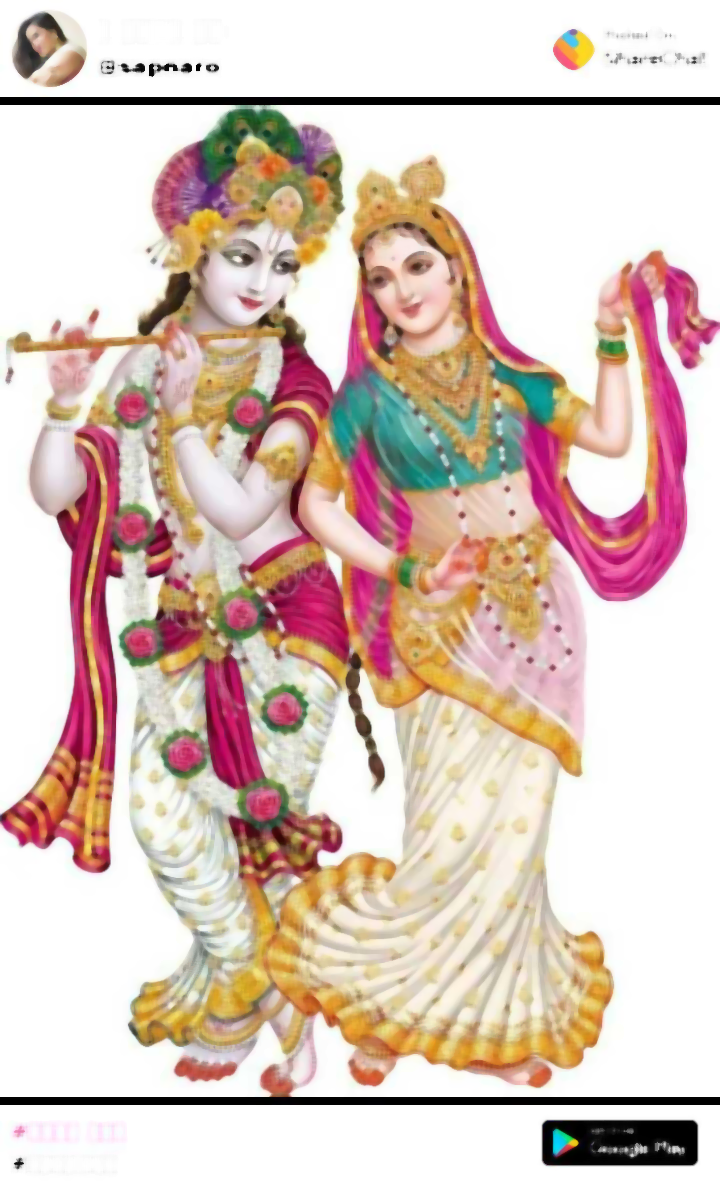

In [9]:
transformType = 'MedianFilter(size=int(param))'
param = 7
imageTransforms(image, type=transformType, param=param)

# interactive transforms

### helper functions

In [10]:
transformDropdown, paramSlider, thresholdSlider = interact_setup(transforms, 
                                                                 THRESHOLD, THRESHOLD_MIN, THRESHOLD_MAX, THRESHOLD_STEP)

In [11]:
def do_the_interactive_thing(transformDropdown, paramSlider, thresholdSlider):
    imageSearch.thresh = thresholdSlider
    imageTransformed, ret_image, new_doc_id, new_doc_dist = get_transform(image, transformDropdown, paramSlider, imageSearch, 
                                                                         doc_id=doc_id, images=images)
    plot_transforms(image, imageTransformed, ret_image, new_doc_dist, transformDropdown)

### Note
Slider only works for:
- crop
- rotate
- GaussianBlur  
- MedianFilter
- MinFilter
- MaxFilter
- ModeFilter  

following transforms don't return the original image within set threshold of 20:
- CONTOUR
- EMBOSS
- FIND_EDGES

### HERE

In [20]:
# uncomment what you're looking for

# set opt='from_url' and image_url='www.xxx.jpg' to set custom image
# image_url = 'https://picsum.photos/id/448/1024/768'
# i, image = get_random_image(opt='from_url', image_url=image_url)

# opt='from_sample' to return random image from our sample
doc_id, image = get_random_image(opt='from_sample', images=images, db=db, DATA_SOURCE=DATA_SOURCE)

# leave opt blank to get random image from the data source specified at the top of the file
# i, image = get_random_image()

### be patient, image updates on every small change
to check the returned doc is the same look at first print line:  
doc_id original_number => similar_doc_number

In [21]:
interact(do_the_interactive_thing, transformDropdown=transformDropdown, paramSlider=paramSlider, 
         thresholdSlider=thresholdSlider)

interactive(children=(Dropdown(description='Transform: ', options=('None', 'crop', 'rotate', 'invert', 'mirror…

<function __main__.do_the_interactive_thing(transformDropdown, paramSlider, thresholdSlider)>

## return many similar images
uses the same imageSearch object
### HERE

In [30]:
# optional: get new random image
doc_id, image = get_random_image(opt='from_sample', images=images, db=db, DATA_SOURCE=DATA_SOURCE)
num_similar = 4  # number of similar images to return
imageSearch.thresh = 100

Found 3 similar posts out of 4 requested with threshold 100
list index out of range


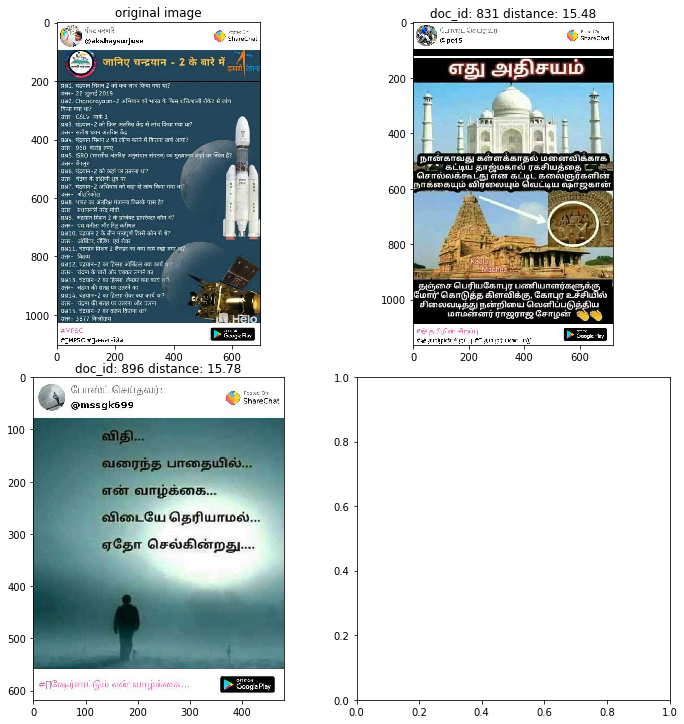

In [31]:
ret_image, ret = get_similar(image, num_similar, imageSearch, images)
plot_similar(image, ret_image, ret, num_similar, thresh=imageSearch.thresh)